In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
np.set_printoptions(precision=2)

In [3]:
column_names = ["Size (sqft)", "Number of Bedrooms", "Number of Floors", "Age of Home", "Price (1000s dollars)"]
df = pd.read_csv("house.csv", names=column_names)
df.head()


,Size (sqft),Number of Bedrooms,Number of Floors,Age of Home,Price (1000s dollars)
0,952.0,2.0,1.0,65.0,271.5
1,1244.0,3.0,1.0,64.0,300.0
2,1947.0,3.0,2.0,17.0,509.8
3,1725.0,3.0,2.0,42.0,394.0
4,1959.0,3.0,2.0,15.0,540.0


In [4]:
X_train = df.drop(columns="Price (1000s dollars)")
Y_train = df[["Price (1000s dollars)"]]

In [5]:
scaler = StandardScaler()
column_names = ["Size (sqft)", "Number of Bedrooms", "Number of Floors", "Age of Home"]
X_norm = pd.DataFrame(scaler.fit_transform(X_train), columns=column_names)
print(f"Peak to Peak range by column in Raw        X:\n{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:\n{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:
Size (sqft)           2406.0
Number of Bedrooms       4.0
Number of Floors         1.0
Age of Home             95.0
dtype: float64
Peak to Peak range by column in Normalized X:
Size (sqft)           5.837357
Number of Bedrooms    6.129234
Number of Floors      2.060214
Age of Home           3.684309
dtype: float64


In [6]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, Y_train.values.ravel())
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 129, number of weight updates: 12901.0


In [7]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters: w: {w_norm}, b:{b_norm}")

model parameters: w: [110.3  -21.25 -32.42 -37.85], b:[362.26]


In [8]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b. 
y_pred = np.dot(X_norm, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{Y_train[:4].values.ravel()}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[248.53 295.58 485.88 389.78]
Target values 
[271.5 300.  509.8 394. ]


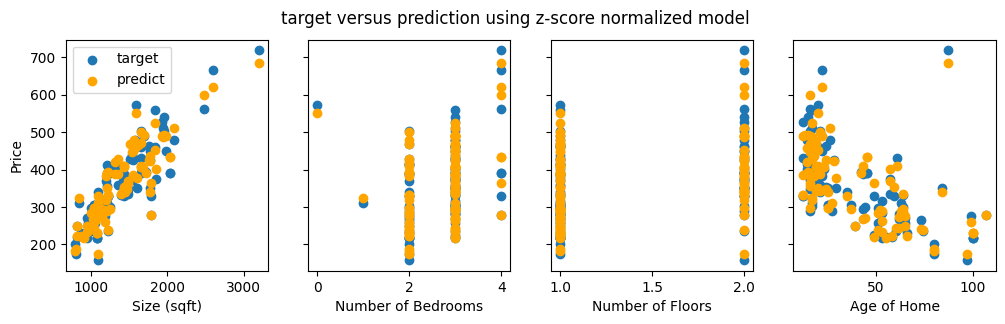

In [9]:
# plot predictions and targets vs original features    
fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[X_train.columns[i]], Y_train, label = 'target')
    ax[i].set_xlabel(X_train.columns[i])
    ax[i].scatter(X_train[X_train.columns[i]], y_pred, color="orange", label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

In [10]:
# Create a scaled DataFrame for the input features with valid column names
column_names = ["Size (sqft)", "Number of Bedrooms", "Number of Floors", "Age of Home"]
input_features = pd.DataFrame([[1200, 3, 1, 40]], columns=column_names)
scaled_input_features = pd.DataFrame(scaler.transform(input_features), columns=column_names)

# Make the prediction using the scaled input features
prediction = sgdr.predict(scaled_input_features)

print(f"Predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ${prediction[0] * 1000:0.2f}")


Predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = $319029.50


### Saving model for future use

In [11]:
import pickle

In [12]:
with open("model_pickle", "wb") as f:
    pickle.dump(sgdr, f)

In [13]:
with open("model_pickle", "rb") as f:
    mp = pickle.load(f)

In [14]:
# Create a scaled DataFrame for the input features with valid column names
input_features = np.array([1200, 3, 1, 40]).reshape(1, -1)

column_names = ["Size (sqft)", "Number of Bedrooms", "Number of Floors", "Age of Home"]
scaled_input_features = pd.DataFrame(scaler.transform(input_features), columns=column_names)

# Make the prediction using the scaled input features
prediction = mp.predict(scaled_input_features)

print(f"Predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ${prediction[0] * 1000:0.2f}")


Predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = $319029.50


/home/khalid/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
